In [3]:
pip install tensorflow

In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from PIL import Image

# Define directories
train_dir = '/content/train'
test_dir = '/content/test'

print('Train directory:', os.listdir(train_dir))

train_Alex_dir = os.path.join(train_dir, 'Alex')
train_Not_Alex_dir = os.path.join(train_dir, 'Not_Alex')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary'
)

#load test image
test_image_path = os.path.join(test_dir, 'test_image.JPG')
test_image = Image.open(test_image_path).resize((32, 32))
test_image = np.array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

#print(test_image)
#print(train_generator)

Train directory: ['Not_Alex', '.ipynb_checkpoints', 'Alex']
Found 4 images belonging to 3 classes.


In [17]:
# Build simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_generator, epochs=10)


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 2.9970 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 749ms/step - loss: 0.0099 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 1s 775ms/step - loss: 8.4453e-04 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 776ms/step - loss: 1.2374e-05 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 759ms/step - loss: 5.0578e-07 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 747ms/step - loss: 2.4654e-08 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 503ms/step - loss: 8.8071e-10 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 1s 527ms/step - loss: 4.1508e-10 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 1s 517ms/step - loss: 2.0513e-10 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 526ms/step - loss: 4.1854e-09 - acc

1/1 [==============================] - 0s 80ms/step


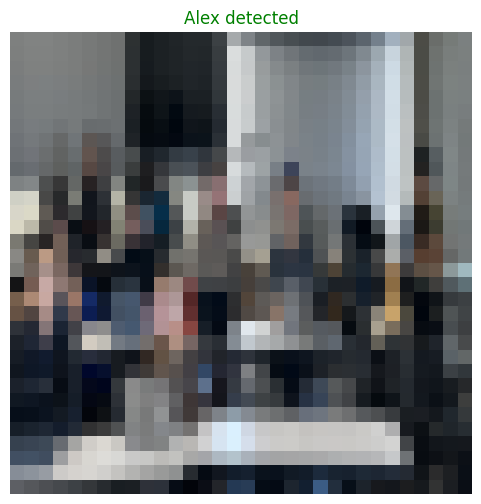

In [21]:
prediction = model.predict(test_image)

#determine whether alex is in the model
if prediction[0][0] > 0.5:
    prediction_text = "Alex detected"
    color = 'green'
else:
    prediction_text = "Alex not detected"
    color = 'red'

plt.figure(figsize=(6, 6))
plt.imshow(test_image[0])
plt.title(prediction_text, color=color)
plt.axis('off')
plt.show()